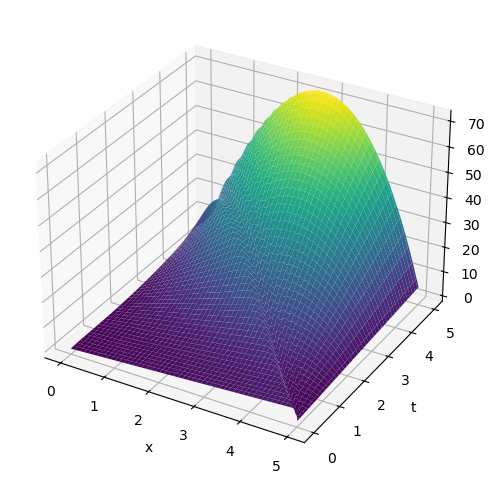

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# параметры задачи
L = 5.0       # длина отрезка по x
T = 5.0       # максимальное время
Nx = 100      # число узлов по x
Nt = 500      # число шагов по времени
dx = L / (Nx - 1)
dt = T / Nt

x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt+1)

# сетка для решения
u = np.zeros((Nt+1, Nx))

# начальные условия
u[0, :] = x              # u(x,0)=x
u[1, :] = u[0, :]        # временный шаг, потом уточним по схеме
# скорость начальная: u_t(x,0)=0 => используем это при втором шаге

# правая часть f(x,t)=x(2+t)
def f(x, t):
    return x * (2 + t)

# шаги по времени (явная схема для волнового уравнения)
for n in range(1, Nt):
    for i in range(1, Nx-1):
        u[n+1, i] = (2*u[n, i] - u[n-1, i]
                     + (dt**2/dx**2)*(u[n, i+1] - 2*u[n, i] + u[n, i-1])
                     + dt**2 * f(x[i], t[n]))

    # граничные условия:
    # u(5,t) = t
    u[n+1, -1] = t[n+1]

    # u_x(0,t) + 5u(0,t) = 1 - t
    # аппроксимация: (u[1]-u[0])/dx + 5*u[0] = 1 - t
    u[n+1, 0] = ( (1 - t[n+1]) * dx + u[n+1, 1] ) / (5*dx + 1)

# визуализация
X, Tm = np.meshgrid(x, t)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Tm, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# параметры задачи
L = 5.0
T = 5.0
Nx = 100
Nt = 500
dx = L / (Nx - 1)
dt = T / Nt

x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt+1)
u = np.zeros((Nt+1, Nx))

# начальные условия
u[0, :] = x
u[1, :] = u[0, :]

def f(x, t):
    return x * (2 + t)

# схема во времени
for n in range(1, Nt):
    for i in range(1, Nx-1):
        u[n+1, i] = (2*u[n, i] - u[n-1, i]
                     + (dt**2/dx**2)*(u[n, i+1] - 2*u[n, i] + u[n, i-1])
                     + dt**2 * f(x[i], t[n]))
    # границы
    u[n+1, -1] = t[n+1]
    u[n+1, 0] = ((1 - t[n+1]) * dx + u[n+1, 1]) / (5*dx + 1)

# интерактивный график
def plot_profile(frame=0):
    plt.figure(figsize=(7,4))
    plt.plot(x, u[frame, :], label=f"t = {t[frame]:.2f}")
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.title("Профиля струны во времени для конкретного момента времени с возможностью изменения")
    plt.legend()
    plt.grid(True)
    plt.show()

interact(plot_profile, frame=IntSlider(min=0, max=Nt, step=10, value=0))


interactive(children=(IntSlider(value=0, description='frame', max=500, step=10), Output()), _dom_classes=('wid…

<function __main__.plot_profile(frame=0)>

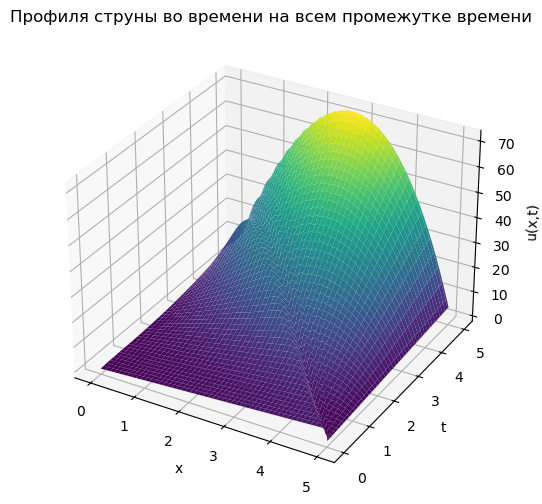

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

X, Tm = np.meshgrid(x, t)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Tm, u, cmap='viridis')

ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u(x,t)")
ax.set_title("Профиля струны во времени на всем промежутке времени")
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, IntSlider

Lx, Ly = 5.0, 9.0
T = 2.0
Nx, Ny = 60, 100
Nt = 200
dx, dy = Lx/(Nx-1), Ly/(Ny-1)
dt = T/Nt

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing="ij")

u = np.zeros((Nt+1, Nx, Ny))
u[0,:,:] = np.exp(X + Y)
u[1,:,:] = u[0,:,:] + dt*np.exp(X - Y)

for n in range(1, Nt):
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            uxx = (u[n,i+1,j] - 2*u[n,i,j] + u[n,i-1,j]) / dx**2
            uyy = (u[n,i,j+1] - 2*u[n,i,j] + u[n,i,j-1]) / dy**2
            u[n+1,i,j] = 2*u[n,i,j] - u[n-1,i,j] + dt**2*(uxx + uyy)

    u[n+1,0,:] = 0               
    u[n+1,-1,:] = u[n+1,-2,:]      
    u[n+1,:,0] = u[n+1,:,1]       
    u[n+1,:,-1] = 0                

def plot_surface(frame=0):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, u[frame,:,:], cmap="viridis")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("u(x,y,t)")
    ax.set_title(f"Профиль струны при t = {frame*dt:.2f}")
    plt.show()

interact(plot_surface, frame=IntSlider(min=0, max=Nt, step=5, value=0))


interactive(children=(IntSlider(value=0, description='frame', max=200, step=5), Output()), _dom_classes=('widg…

<function __main__.plot_surface(frame=0)>